In [78]:
import pandas as pd
import numpy as np

In [112]:
ab = pd.read_csv('post_abtest_data.csv',na_values='?')
ab.head()

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
0,867689,2020-05-28,1,Control,1,1,no surge,Android,0.0,1.0,Control
1,867689,2020-05-29,1,Control,1,0,surge,iOS,NaN,NaN,Control
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
3,752172,2020-05-29,1,Control,1,1,surge,Android,0.0,1.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control


# Гипотеза:
При уточнении, уверен ли юзер в отмене заказа не из центра, добавить эмодзи котика, просящего не отменять. 

*Ожидаем:* ниже отмены по заказам НЕ из центра

H0 - показатель user_cancelled в двух группах не отличается. H1 - показатель user_cancelled в тестовой группе выше 

Уровень значимости 0,05. 

In [113]:
#фильтруем выборку
no_city_center = ab.loc[(ab['city_center_order'] == 0)]
no_city_center

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
101478,403957,2020-05-31,1,Test,1,1,surge,Android,1.0,0.0,Test
101479,777242,2020-05-30,1,Test,1,1,no surge,iOS,0.0,0.0,Test
101485,155474,2020-05-25,1,Test,1,1,no surge,Android,0.0,0.0,Test
101486,946650,2020-05-26,1,Test,1,1,surge,Android,0.0,0.0,Test


In [114]:
#считаем показатели отмены поюзерно
pd.options.mode.chained_assignment = None
no_city_center.user_cancelled = no_city_center.groupby('user_id', as_index=False)['user_cancelled'].sum()['user_cancelled']
no_city_center

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,1.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
101478,403957,2020-05-31,1,Test,1,1,surge,Android,NaN,0.0,Test
101479,777242,2020-05-30,1,Test,1,1,no surge,iOS,NaN,0.0,Test
101485,155474,2020-05-25,1,Test,1,1,no surge,Android,NaN,0.0,Test
101486,946650,2020-05-26,1,Test,1,1,surge,Android,NaN,0.0,Test


In [115]:
#удаляем значения, где отмена не рассчитана
no_city_center = no_city_center.dropna()
no_city_center

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,1.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
19559,578870,2020-05-29,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19560,354279,2020-05-27,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19563,354279,2020-05-25,1,Control,1,1,no surge,Android,0.0,0.0,Control
19564,819814,2020-05-29,1,Test,1,1,no surge,iOS,0.0,0.0,Test


In [116]:
#собираем контрольную группу
no_city_center_control = no_city_center.loc[(no_city_center['group'] == 'Control')]
no_city_center_control

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
2,867689,2020-05-25,1,Control,1,1,surge,Android,1.0,0.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
19553,578870,2020-05-28,1,Control,1,1,surge,Android,0.0,0.0,Control
19559,578870,2020-05-29,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19560,354279,2020-05-27,1,Control,1,1,no surge,iOS,0.0,0.0,Control
19563,354279,2020-05-25,1,Control,1,1,no surge,Android,0.0,0.0,Control


In [117]:
#собираем тестовую группу
no_city_center_test = no_city_center.loc[(no_city_center['group'] == 'Test')]
no_city_center_test

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
17,139455,2020-05-31,1,Test,1,1,surge,Android,0.0,0.0,Test
21,139455,2020-05-30,1,Test,1,1,no surge,Android,1.0,0.0,Test
31,682337,2020-05-25,1,Test,1,1,no surge,iOS,1.0,0.0,Test
34,682337,2020-05-27,1,Test,1,1,no surge,iOS,0.0,0.0,Test
35,682337,2020-05-31,1,Test,1,1,no surge,Android,0.0,0.0,Test
...,...,...,...,...,...,...,...,...,...,...,...
19548,426688,2020-05-31,1,Test,1,1,no surge,Android,0.0,0.0,Test
19549,426688,2020-05-29,1,Test,1,1,no surge,Android,0.0,0.0,Test
19550,426688,2020-05-30,1,Test,1,1,no surge,iOS,1.0,0.0,Test
19552,426688,2020-05-28,1,Test,1,1,surge,iOS,0.0,0.0,Test


In [85]:
no_city_center_control.date.max()

'2020-05-31'

In [86]:
no_city_center_control.date.min()

'2020-05-25'

In [87]:
no_city_center_test.date.max()

'2020-05-31'

In [88]:
no_city_center_test.date.min()

'2020-05-25'

In [118]:
#сгруппируем данные по дате
no_city_center_test_date = no_city_center_test.groupby('date').agg({'user_id':'nunique', 'user_cancelled':'sum'}).reset_index()
no_city_center_test_date

,date,user_id,user_cancelled
0,2020-05-25,506,205.0
1,2020-05-26,495,166.0
2,2020-05-27,521,204.0
3,2020-05-28,466,181.0
4,2020-05-29,492,200.0
5,2020-05-30,498,184.0
6,2020-05-31,501,199.0


In [119]:
no_city_center_control_date = no_city_center_control.groupby('date').agg({'user_id':'nunique', 'user_cancelled':'sum'}).reset_index()
no_city_center_control_date

,date,user_id,user_cancelled
0,2020-05-25,459,175.0
1,2020-05-26,421,146.0
2,2020-05-27,440,176.0
3,2020-05-28,463,170.0
4,2020-05-29,469,178.0
5,2020-05-30,497,183.0
6,2020-05-31,445,161.0


In [120]:
#посчитаем показатель отмен к количеству юзеров по дате
no_city_center_control_date['u_c/user_id'] = np.where(no_city_center_control_date['user_id'] < 1, no_city_center_control_date['user_id'], no_city_center_control_date['user_cancelled']/no_city_center_control_date['user_id'])
no_city_center_control_date

,date,user_id,user_cancelled,u_c/user_id
0,2020-05-25,459,175.0,0.381264
1,2020-05-26,421,146.0,0.346793
2,2020-05-27,440,176.0,0.400000
3,2020-05-28,463,170.0,0.367171
4,2020-05-29,469,178.0,0.379531
5,2020-05-30,497,183.0,0.368209
6,2020-05-31,445,161.0,0.361798


In [121]:
no_city_center_test_date['u_c/user_id'] = np.where(no_city_center_test_date['user_id'] < 1, no_city_center_test_date['user_id'], no_city_center_test_date['user_cancelled']/no_city_center_test_date['user_id'])
no_city_center_test_date

,date,user_id,user_cancelled,u_c/user_id
0,2020-05-25,506,205.0,0.405138
1,2020-05-26,495,166.0,0.335354
2,2020-05-27,521,204.0,0.391555
3,2020-05-28,466,181.0,0.388412
4,2020-05-29,492,200.0,0.406504
5,2020-05-30,498,184.0,0.369478
6,2020-05-31,501,199.0,0.397206


In [122]:
import scipy.stats as stats
#попробуем сравнить группы по показателю отмены поездки
t, p_value = stats.ttest_ind(no_city_center_control_date['u_c/user_id'], no_city_center_test_date['u_c/user_id']) #Критерий Стьюдента (t-test)
t, p_value

(-1.1115258840928286, 0.2881160205864232)

In [123]:
stats.ttest_ind(no_city_center_control_date['u_c/user_id'], no_city_center_test_date['u_c/user_id'], equal_var = False)

Ttest_indResult(statistic=-1.1115258840928286, pvalue=0.2911506517648747)

In [124]:
alpha = 0.05
if p_value < alpha:
    print('p-value меньше уровня значимости -- значит гипотезу о том, что выборки различаются, следует отвергнуть')
else: 
    print('p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять') 

p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять


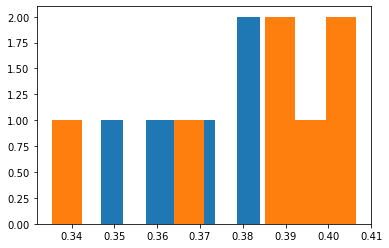

In [125]:
import matplotlib.pyplot as plt
plt.hist(no_city_center_control_date['u_c/user_id'], bins=10); 
plt.hist(no_city_center_test_date['u_c/user_id'], bins=10);

In [228]:
#посчитаем p-value по дням
    #сначала посчитаем показатель отмен
no_city_center_control.order_made = no_city_center.groupby('user_id', as_index=False)['order_made'].sum()['order_made']
no_city_center_control['u_c/o_m'] = np.where(no_city_center_control['order_made'] < 1, no_city_center_control['order_made'], no_city_center_control['user_cancelled']/no_city_center_control['order_made'])
no_city_center_control

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,u_c/o_m
2,867689,2020-05-25,1,Control,1,3,surge,Android,1.0,0.0,Control,0.333333
4,752172,2020-05-28,1,Control,1,2,no surge,iOS,0.0,0.0,Control,0.000000
6,486559,2020-05-31,1,Control,1,2,no surge,iOS,0.0,0.0,Control,0.000000
7,486559,2020-05-30,1,Control,1,2,no surge,Android,0.0,0.0,Control,0.000000
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3397,548833,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control,0.000000
3398,548833,2020-05-27,1,Control,1,1,no surge,Android,1.0,0.0,Control,1.000000
3406,560931,2020-05-26,1,Control,1,1,no surge,iOS,0.0,0.0,Control,0.000000
3410,516326,2020-05-29,1,Control,1,3,no surge,Android,1.0,0.0,Control,0.333333


In [229]:
no_city_center_test.order_made = no_city_center.groupby('user_id', as_index=False)['order_made'].sum()['order_made']
no_city_center_test['u_c/o_m'] = np.where(no_city_center_test['order_made'] < 1, no_city_center_test['order_made'], no_city_center_test['user_cancelled']/no_city_center_test['order_made'])
no_city_center_test

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,u_c/o_m
17,139455,2020-05-31,1,Test,1,1.0,surge,Android,0.0,0.0,Test,0.000000
21,139455,2020-05-30,1,Test,1,3.0,no surge,Android,1.0,0.0,Test,0.333333
31,682337,2020-05-25,1,Test,1,2.0,no surge,iOS,1.0,0.0,Test,0.500000
34,682337,2020-05-27,1,Test,1,2.0,no surge,iOS,0.0,0.0,Test,0.000000
35,682337,2020-05-31,1,Test,1,3.0,no surge,Android,0.0,0.0,Test,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
19548,426688,2020-05-31,1,Test,1,NaN,no surge,Android,0.0,0.0,Test,NaN
19549,426688,2020-05-29,1,Test,1,NaN,no surge,Android,0.0,0.0,Test,NaN
19550,426688,2020-05-30,1,Test,1,NaN,no surge,iOS,1.0,0.0,Test,NaN
19552,426688,2020-05-28,1,Test,1,NaN,surge,iOS,0.0,0.0,Test,NaN


In [231]:
#удаляем значения, где показатель не рассчитан
no_city_center_control = no_city_center_control.dropna()
no_city_center_control

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,u_c/o_m
2,867689,2020-05-25,1,Control,1,3,surge,Android,1.0,0.0,Control,0.333333
4,752172,2020-05-28,1,Control,1,2,no surge,iOS,0.0,0.0,Control,0.000000
6,486559,2020-05-31,1,Control,1,2,no surge,iOS,0.0,0.0,Control,0.000000
7,486559,2020-05-30,1,Control,1,2,no surge,Android,0.0,0.0,Control,0.000000
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3397,548833,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control,0.000000
3398,548833,2020-05-27,1,Control,1,1,no surge,Android,1.0,0.0,Control,1.000000
3406,560931,2020-05-26,1,Control,1,1,no surge,iOS,0.0,0.0,Control,0.000000
3410,516326,2020-05-29,1,Control,1,3,no surge,Android,1.0,0.0,Control,0.333333


In [232]:
no_city_center_test = no_city_center_test.dropna()
no_city_center_test

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,u_c/o_m
17,139455,2020-05-31,1,Test,1,1.0,surge,Android,0.0,0.0,Test,0.000000
21,139455,2020-05-30,1,Test,1,3.0,no surge,Android,1.0,0.0,Test,0.333333
31,682337,2020-05-25,1,Test,1,2.0,no surge,iOS,1.0,0.0,Test,0.500000
34,682337,2020-05-27,1,Test,1,2.0,no surge,iOS,0.0,0.0,Test,0.000000
35,682337,2020-05-31,1,Test,1,3.0,no surge,Android,0.0,0.0,Test,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3387,456117,2020-05-25,1,Test,1,2.0,no surge,Android,0.0,0.0,Test,0.000000
3389,456117,2020-05-30,1,Test,1,4.0,no surge,Android,0.0,0.0,Test,0.000000
3399,724769,2020-05-28,1,Test,1,1.0,surge,iOS,0.0,0.0,Test,0.000000
3413,736903,2020-05-30,1,Test,1,1.0,no surge,iOS,0.0,0.0,Test,0.000000


In [233]:
#посчитаем p-value по дням
    #разобьем на группы по дате
no_city_center_control_25 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-25')]
no_city_center_control_26 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-26')]
no_city_center_control_27 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-27')]
no_city_center_control_28 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-28')]
no_city_center_control_29 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-29')]
no_city_center_control_30 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-30')]
no_city_center_control_31 = no_city_center_control.loc[(no_city_center_control['date'] == '2020-05-31')]
no_city_center_control_31

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,u_c/o_m
6,486559,2020-05-31,1,Control,1,2,no surge,iOS,0.0,0.0,Control,0.00
10,486559,2020-05-31,1,Control,1,4,surge,Android,1.0,0.0,Control,0.25
11,304024,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control,0.00
99,320419,2020-05-31,1,Control,1,2,surge,Android,0.0,0.0,Control,0.00
163,634314,2020-05-31,1,Control,1,2,no surge,iOS,1.0,0.0,Control,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,968937,2020-05-31,1,Control,1,4,no surge,iOS,0.0,0.0,Control,0.00
3309,628737,2020-05-31,1,Control,1,1,no surge,Android,0.0,0.0,Control,0.00
3353,472084,2020-05-31,1,Control,1,1,no surge,Android,0.0,0.0,Control,0.00
3373,585043,2020-05-31,1,Control,1,1,no surge,Android,2.0,0.0,Control,2.00


In [234]:
no_city_center_test_25 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-25')]
no_city_center_test_26 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-26')]
no_city_center_test_27 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-27')]
no_city_center_test_28 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-28')]
no_city_center_test_29 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-29')]
no_city_center_test_30 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-30')]
no_city_center_test_31 = no_city_center_test.loc[(no_city_center_test['date'] == '2020-05-31')]
no_city_center_test_31

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,u_c/o_m
17,139455,2020-05-31,1,Test,1,1.0,surge,Android,0.0,0.0,Test,0.000000
35,682337,2020-05-31,1,Test,1,3.0,no surge,Android,0.0,0.0,Test,0.000000
37,682337,2020-05-31,1,Test,1,2.0,no surge,Android,0.0,0.0,Test,0.000000
143,824898,2020-05-31,1,Test,1,8.0,no surge,Android,1.0,0.0,Test,0.125000
335,372784,2020-05-31,1,Test,1,4.0,no surge,iOS,0.0,0.0,Test,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3270,793504,2020-05-31,1,Test,1,3.0,no surge,Android,2.0,0.0,Test,0.666667
3288,304616,2020-05-31,1,Test,1,2.0,no surge,iOS,0.0,0.0,Test,0.000000
3299,823932,2020-05-31,1,Test,1,1.0,surge,Android,1.0,0.0,Test,1.000000
3312,591644,2020-05-31,1,Test,1,3.0,no surge,iOS,1.0,0.0,Test,0.333333


In [235]:
#сравниваем группы по показателю отмены поездки по датам
t_25, p_value_25 = stats.ttest_ind(no_city_center_control_25['u_c/o_m'], no_city_center_test_25['u_c/o_m']) #Критерий Стьюдента (t-test)
t_25, p_value_25

(-0.3799366492273265, 0.704425914811248)

In [236]:
t_26, p_value_26 = stats.ttest_ind(no_city_center_control_26['u_c/o_m'], no_city_center_test_26['u_c/o_m']) #Критерий Стьюдента (t-test)
t_26, p_value_26

(-0.5889592007315927, 0.5565809284028389)

In [237]:
t_27, p_value_27 = stats.ttest_ind(no_city_center_control_27['u_c/o_m'], no_city_center_test_27['u_c/o_m']) #Критерий Стьюдента (t-test)
t_27, p_value_27

(0.9150946602594271, 0.3613461482747057)

In [238]:
t_28, p_value_28 = stats.ttest_ind(no_city_center_control_28['u_c/o_m'], no_city_center_test_28['u_c/o_m']) #Критерий Стьюдента (t-test)
t_28, p_value_28

(-1.0061775428862985, 0.31573541715849657)

In [239]:
t_29, p_value_29 = stats.ttest_ind(no_city_center_control_29['u_c/o_m'], no_city_center_test_29['u_c/o_m']) #Критерий Стьюдента (t-test)
t_29, p_value_29

(-0.8223610936979957, 0.41205109564666953)

In [240]:
t_30, p_value_30 = stats.ttest_ind(no_city_center_control_30['u_c/o_m'], no_city_center_test_30['u_c/o_m']) #Критерий Стьюдента (t-test)
t_30, p_value_30

(1.2843722322492042, 0.20058382060640426)

In [241]:
t_31, p_value_31 = stats.ttest_ind(no_city_center_control_31['u_c/o_m'], no_city_center_test_31['u_c/o_m']) #Критерий Стьюдента (t-test)
t_31, p_value_31

(0.5291600171765318, 0.597278347098263)

In [242]:
p_values = pd.DataFrame(columns = ['p_value'])
p_value_date = [p_value_25, p_value_26, p_value_27, p_value_28, p_value_29, p_value_30, p_value_31]
print (p_value_date)

[0.704425914811248, 0.5565809284028389, 0.3613461482747057, 0.31573541715849657, 0.41205109564666953, 0.20058382060640426, 0.597278347098263]


In [243]:
p_value_date = [p_value_25, p_value_26, p_value_27, p_value_28, p_value_29, p_value_30, p_value_31]
date = ['25/05', '26/05', '27/05', '28/05', '29/05', '30/05', '31/05']
for i in p_value_date:
    new_row = {'p_value':i}
    p_values = p_values.append(new_row, ignore_index=True)
p_values

,p_value
0,0.704426
1,0.556581
2,0.361346
3,0.315735
4,0.412051
5,0.200584
6,0.597278


<AxesSubplot:title={'center':'p_value по дням'}, xlabel='[25/05, 26/05, 27/05, 28/05, 29/05, 30/05, 31/05]', ylabel='p_value'>

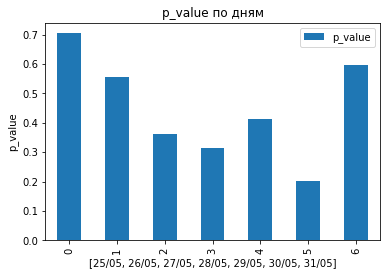

In [244]:
p_values.plot(kind='bar', title='p_value по дням',
                    xlabel=date,
                    ylabel='p_value')

Как видно на графике, уровень p_value по дням заметно отличается, поэтому изначально по групповой выборке p_value был выше уровня значимости. Нельзя говорить о том, что мы получили значимые результаты теста. 